# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


In [1]:
import torch

# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [ ]:
def generate_octave(init_level, s, sigma): 
    octave = [init_level]
    # per l'intervallo s ricevuto in input genero l'ottava, e definisco la costante per l'ottava in question
    k = 2**(1/s) 
    for _ in range(s+2): 
        # applico il filtro gaussiano
        next_level = ndimage.gaussian_filter(octave[-1],k * sigma)
        octave.append(next_level) 
    return octave

def generate_gaussian_pyramid(im, num_octave, s, sigma): 
    pyr = [] 
    for _ in range(num_octave): 
        octave = generate_octave(im, s, sigma) 
        pyr.append(octave) 
        im = octave[-3][::2, ::2] 
    return pyr

def generate_DoG_octave(gaussian_octave,use_concat): 
    octave = [] 
    # per ogni ottava restituisco la differenza tra la stessa e la precedente
    # per fare ciò partiamo dallla prima
    for i in range(1, len(gaussian_octave)):   
        octave.append(gaussian_octave[i] - gaussian_octave[i-1]) 
    return octave

def generate_DoG_pyramid(gaussian_pyramid,): 
    pyr = [] 
    for gaussian_octave in gaussian_pyramid: 
        pyr.append(generate_DoG_octave(gaussian_octave)) 
    return pyr

def feature_pyramid(image, num_octave = 4, s = 2, sigma = 1):
    # passo 1 - genero la piramide gaussiana
    pyr = generate_gaussian_pyramid(image,num_octave,s,sigma)
    
    # passo 2 - genero la piramide DoG, come differenza delle gaussiane
    d = generate_DoG_pyramid(pyr, True)

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^2 + \exp(b^2) * \sin (d) * c} {3e}
$

*non sono necessarie librerie esterne*

In [30]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

a.retain_grad()
e.retain_grad()
b.retain_grad()
c.retain_grad()
d.retain_grad()

a_square = torch.pow(a, 2)
a_square.retain_grad()

b_square = torch.pow(b, 2)
b_square.retain_grad()

exp_b = torch.exp(b_square)
exp_b.retain_grad()

sin_d = torch.sin(d)
sin_d.retain_grad()

p1 = exp_b*sin_d
p1.retain_grad()

p2 = p1*c
p2.retain_grad()

s1 = a_square+p2
s1.retain_grad()

three_e = e*3
three_e.retain_grad()

y1 = s1/three_e
y1.retain_grad()

y = torch.sum(y1)
y.backward()

print("a:",a.grad)
print("b:",a.grad)
print("c:",a.grad)
print("d:",a.grad)
print("e:",a.grad)
print("a_square:",a_square.grad)
print("b_square:",b_square.grad)
print("exp_b:",exp_b.grad)
print("sin_d:",sin_d.grad)
print("p1:",p1.grad)
print("p2:",p2.grad)
print("s1:",s1.grad)
print("three_e:",three_e.grad)
print("y1:",y1.grad)

a: tensor([[0.6667, 2.0000],
        [4.6667, 5.3333],
        [0.6667, 1.3333]])
b_square: tensor([[ 4.9121e+02, -1.8868e+03],
        [ 0.0000e+00,  6.2752e+00],
        [ 8.1120e+14,  4.5943e+01]])
exp_b: tensor([[ 0.0606, -0.2328],
        [ 0.0000,  2.3085],
        [ 0.1882,  0.8415]])
sin_d: tensor([[5.4021e+02, 6.7526e+03],
        [0.0000e+00, 6.3427e+00],
        [5.7483e+15, 5.4598e+01]])
p1: tensor([[0.0667, 0.8333],
        [0.0000, 2.3333],
        [1.3333, 1.0000]])
p2: tensor([[0.0667, 0.1667],
        [0.3333, 0.3333],
        [0.3333, 0.3333]])
s1: tensor([[0.0667, 0.1667],
        [0.3333, 0.3333],
        [0.3333, 0.3333]])
three_e: tensor([[-3.2858e+01,  3.1346e+02],
        [-5.4444e+00, -9.2028e+00],
        [-2.7040e+14, -1.5759e+01]])
y1: tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


Per calcolarli a mano si può utilizzare la chain rule. Ad esempio per il tensore si possono moltiplicare i contribuiti delle derivate parziali del suo cammino. In questo caso particolare, per come è formato il grafo no è necessario utilizare la regola della distribuzione.

# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

# Esercizio 4

Dato il seguente frammento di codice

In [2]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

Come prima passo possiamo calcolare le dimensioni che si ottengono dalla prima convoluzione. Considerando che le dimensioni in inout sono le medesime, e non ci sono differente di padding/stride sulle due diverse dimensioni possiamo effettuare un calcolo unico. Consideriamo i sefuenti dati:
* I = 400
* K = 3
* D = 1 (Non essendo specificata rimane quella di default)
* S = 2
* P = 1
  
Aplichiamo la formula ((I - K - (K - 1) ( D - 1) + 2P) / S) + 1, ottenendo cosi come dimensioni per la prima convoluzione: 200.5
  
  
Arrotondo a 200 e provo a calcolare gli altri
  
Per la seconda convoluzione consideriamo la prima dimensione con k=3
* I = 200
* K = 3
* D = 1 (Non essendo specificata rimane quella di default)
* S = 3
* P = 0
  
Otteniamo: 66.66

Per la seconda convoluzione consideriamo la seconda dimensione con k=5
* I = 200
* K = 5
* D = 1 (Non essendo specificata rimane quella di default)
* S = 4
* P = 1
  
Otteniamo: 50.25

  
A meno che non utilizzo erroneamente la formula per il calcolo ottengo valori decimali

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

In [33]:
conv_dim_compute = lambda i, k, d, s, p: ((i - k - ( k - 1) * ( d - 1) + 2 * p) / s) + 1

print(conv_dim_compute(400,3,1,2,1))
print(conv_dim_compute(200,3,1,3,0))
print(conv_dim_compute(200,5,1,4,1))

test = torch.rand(1, 3, 400, 400)
y = model(test)


print(conv_dim_compute(200,5,1,4,1))

200.5
66.66666666666667
50.25


# Esercizio 5

Adattare/semplificare la rete VGG affinché gestisca un input di immagini 400x400

In [18]:
from torchvision import models

modelPreTrained = models.vgg16(pretrained=True, progress=False)
modelPreTrained

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Per adattare la rete vgg potrei inserire una convoluzione a monte, in cui applico un kernel 2x2, stride=2, padding=24, channel
  
In questo modo ottengo un tensore della dimensione desiderata per poterlo passare alla vgg e utilizzarla normalmente

In [40]:
print(conv_dim_compute(400,2,1,2,24))

224.0


# Esercizio 6

Data la seguente immagine, calcolare la IoU tra i due box mostrati in figura. 
Descrivere tutte le operazioni effettuate

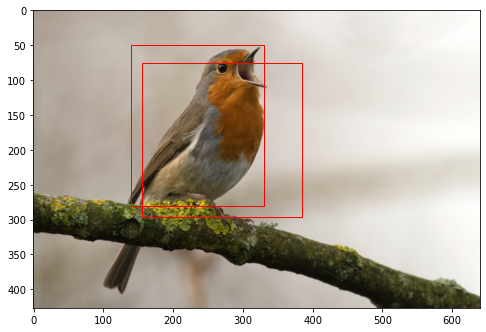

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import matplotlib.patches as patches

def plot_bbox(image_np, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_np)

    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')

        ax.add_patch(rect)

    plt.show();

imageBB1 = mp_image.imread('figure2.jpg')

bb1 = [140, 50, 330, 280] # x1 y1 x2 y2
bb2 = [156, 75, 384, 297]

plot_bbox(imageBB1, np.array([bb1, bb2]))

In [23]:
# passo 1 - per comodità mi estraggo tutti gli estremi dei due box
ya1, xa1, ya2, xa2 = bb1
yb1, xb1, yb2, xb2 = bb2

# passo 2 - mi calcolo l'area dei due box indicati
anchor_area = (ya2 - ya1) * (xa2 - xa1)
box_area = (yb2 - yb1) * (xb2 - xb1)

# passo 3 - mi calcolo i punti del riquadro dell'intersezione
inter_x1 = max(xb1, xa1)
inter_y1 = max(yb1, ya1)
inter_x2 = min(xb2, xa2)
inter_y2 = min(yb2, ya2)

# passo 4 - avendo gli estremi del riquadro intersezione mi calcolo l'area del riquadro intersezione
iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)

# passo 5 - applico la formula, intersezione / unione
iou = iter_area / (anchor_area + box_area - iter_area)


print(iou)

0.608225624936057
